<a href="https://colab.research.google.com/github/Harshil1450/Harshil/blob/main/Ensembling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Theoretical Part.


1. **Can we use Bagging for regression problems?**  
   Yes, Bagging can be used for regression problems. The `BaggingRegressor` in scikit-learn is an example of this, where multiple regressors (such as Decision Trees) are trained on different bootstrapped samples, and their predictions are averaged to make the final prediction.

2. **What is the difference between multiple model training and single model training?**  
   - **Single model training**: A single model is trained on the entire dataset and makes predictions based on its learned patterns.  
   - **Multiple model training**: Multiple models (either of the same type or different types) are trained, and their outputs are combined to improve accuracy and reduce variance.

3. **Explain the concept of feature randomness in Random Forest.**  
   In Random Forest, each tree is trained on a random subset of features at each split rather than considering all features. This introduces feature randomness, helping to reduce correlation among trees and improve generalization.

4. **What is OOB (Out-of-Bag) Score?**  
   The OOB score is an estimate of a model’s performance using the data that was not included in the bootstrap samples (out-of-bag data). It acts as a built-in cross-validation technique for Bagging-based models.

5. **How can you measure the importance of features in a Random Forest model?**  
   Feature importance can be measured using:  
   - **Mean Decrease in Impurity (Gini Importance)**: Features that contribute more to reducing impurity are considered more important.  
   - **Permutation Importance**: Measures how shuffling each feature affects model performance.

6. **Explain the working principle of a Bagging Classifier.**  
   A Bagging Classifier trains multiple base classifiers on different bootstrap samples of the training data. Their predictions are aggregated (e.g., majority voting in classification) to make the final decision, reducing variance and improving stability.

7. **How do you evaluate a Bagging Classifier’s performance?**  
   - Accuracy, Precision, Recall, and F1-score for classification problems.  
   - Cross-validation or OOB score to validate performance.  
   - ROC-AUC for assessing the ability to distinguish between classes.

8. **How does a Bagging Regressor work?**  
   A Bagging Regressor trains multiple regressors on bootstrapped datasets, and the final prediction is obtained by averaging the outputs of all regressors, reducing variance and improving stability.

9. **What is the main advantage of ensemble techniques?**  
   The primary advantage is improved predictive performance by reducing variance (Bagging), bias (Boosting), or both, leading to better generalization.

10. **What is the main challenge of ensemble methods?**  
    Ensemble methods require more computational power and may lead to overfitting if not properly tuned. Interpretability can also be a challenge.

11. **Explain the key idea behind ensemble techniques.**  
    Ensemble techniques combine multiple models to improve performance compared to a single model by reducing errors, increasing stability, and generalizing better.

12. **What is a Random Forest Classifier?**  
    A Random Forest Classifier is an ensemble learning method that builds multiple decision trees and combines their outputs (majority voting for classification) to improve accuracy and reduce overfitting.

13. **What are the main types of ensemble techniques?**  
    - **Bagging**: Reduces variance by training models on different bootstrap samples.  
    - **Boosting**: Reduces bias by training models sequentially, giving more weight to misclassified instances.  
    - **Stacking**: Combines multiple models by training a meta-model on their outputs.

14. **What is ensemble learning in machine learning?**  
    Ensemble learning is a technique that combines multiple models to make better predictions by reducing variance, bias, or both.

15. **When should we avoid using ensemble methods?**  
    - When computational resources are limited.  
    - When a simple, interpretable model is preferred.  
    - When the base model already performs well, and ensembling does not provide significant improvement.

16. **How does Bagging help in reducing overfitting?**  
    Bagging reduces overfitting by training multiple models on different bootstrap samples, averaging their predictions, and reducing variance without significantly increasing bias.

17. **Why is Random Forest better than a single Decision Tree?**  
    - It reduces overfitting by averaging multiple trees.  
    - It provides better generalization.  
    - It is more robust to noise and feature correlations.

18. **What is the role of bootstrap sampling in Bagging?**  
    Bootstrap sampling allows each base model to train on different subsets of the data, ensuring diversity and reducing variance.

19. **What are some real-world applications of ensemble techniques?**  
    - Fraud detection  
    - Medical diagnosis  
    - Image and speech recognition  
    - Recommendation systems  
    - Stock market prediction

20. **What is the difference between Bagging and Boosting?**  
    - **Bagging**: Trains models independently on bootstrapped datasets and aggregates their predictions to reduce variance.  
    - **Boosting**: Trains models sequentially, giving more weight to misclassified instances, reducing bias.


Practical Part

In [1]:
#Q-21>>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X,y = make_classification(n_samples=10000, n_features=10, random_state=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
base_model = DecisionTreeClassifier(random_state = 1)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=100, random_state=1)
bagging_model.fit(X_train,y_train)
y_pred = bagging_model.predict(X_test)
accuracy_score(y_test,y_pred)
print("accuracy =",accuracy_score(y_test,y_pred))

accuracy = 0.966


In [2]:
#Q-22>>
#using same above dataset
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
base_model = DecisionTreeRegressor(random_state = 1)
bagging_reg = BaggingRegressor(estimator = base_model, n_estimators = 100, random_state = 1)
bagging_reg.fit(X_train,y_train)
y_pred = bagging_reg.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))

MSE: 0.03033175


In [7]:
#Q-23>>
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['target'] = bc.target
X= df.drop('target', axis=1)
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)
feature_importances = rfc.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
feature_importance_df.sort_values('importance', ascending=False)

,feature,importance
22,worst perimeter,0.130773
27,worst concave points,0.130307
23,worst area,0.117678
7,mean concave points,0.091731
20,worst radius,0.084314
0,mean radius,0.068120
2,mean perimeter,0.066514
6,mean concavity,0.058548
3,mean area,0.045622
26,worst concavity,0.030877


In [13]:
#Q-24>>
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
iris = load_iris()
X= iris.data
y= iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
rfr = RandomForestRegressor(n_estimators=100, random_state=1)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print("MSE Random forest regressor:",mean_squared_error(y_test,y_pred))
print("R2 Score Random forest regressor:",r2_score(y_test,y_pred))
dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_pred1 = dtr.predict(X_test)
print("MSE Decision tree regressor:",mean_squared_error(y_test,y_pred1))
print("R2 score Decision tree regressor:",r2_score(y_test,y_pred1))

MSE Random forest regressor: 0.03336666666666666
R2 Score Random forest regressor: 0.9380824742268041
MSE Decision tree regressor: 0.03333333333333333
R2 score Decision tree regressor: 0.9381443298969072


In [15]:
#Q-25>>
#using above same dataset
rfe = RandomForestClassifier(n_estimators=100, random_state=1,oob_score = True)
rfe.fit(X_train, y_train)
oob_score = rfe.oob_score_
print("OOB Score:",oob_score*100)

OOB Score: 95.83333333333334


In [22]:
#Q-26>>
#using above same dataset
from sklearn.svm import SVC
bbc = BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=1)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
accuracy_score(y_test,y_pred)
print("Accuracy = ", accuracy_score(y_test,y_pred)*100)

Accuracy =  96.66666666666667


In [30]:
#Q-27>>>
#using the above same dataset
n_estimators = [10, 50, 100,500,1000]
for i in n_estimators:
  rfc = RandomForestClassifier(n_estimators=i, random_state=1)
  rfc.fit(X_train, y_train)
  y_pred = rfc.predict(X_test)
  accuracy_score(y_test,y_pred)
  print("Accuracy = ", accuracy_score(y_test,y_pred)*100)

Accuracy =  96.66666666666667
Accuracy =  96.66666666666667
Accuracy =  96.66666666666667
Accuracy =  96.66666666666667
Accuracy =  96.66666666666667


In [37]:
#Q-28>>
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=20, random_state=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
bbc = BaggingClassifier(estimator=LogisticRegression(), n_estimators=100, random_state=1)
bbc.fit(X_train, y_train)
y_pred_proba =bbc.predict_proba(X_test)[:,1]
print("AUC",roc_auc_score(y_test,y_pred_proba))

AUC 0.9218181818181819


In [39]:
#Q-29>>>
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
X= df.drop('target', axis=1)
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
rfr = RandomForestRegressor(n_estimators=100, random_state=1)
rfr.fit(X_train, y_train)
feature_importances = rfr.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
feature_importance_df.sort_values('importance', ascending=False)

,feature,importance
3,petal width (cm),0.519180
2,petal length (cm),0.467704
1,sepal width (cm),0.009054
0,sepal length (cm),0.004062


In [40]:
#Q-30>>>
#bagging model
bbc = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=1)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
accuracy_score(y_test,y_pred)
print("Accuracy Bagging model= ", accuracy_score(y_test,y_pred)*100)
#Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)
print("Accuracy Random Forest model= ", accuracy_score(y_test,y_pred)*100)

Accuracy Bagging model=  96.66666666666667
Accuracy Random Forest model=  96.66666666666667


In [44]:
#Q-31>>>
from sklearn.model_selection import GridSearchCV
X,y = make_classification(n_samples = 1000,n_features = 20,n_redundant = 10,random_state = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rfe = RandomForestClassifier(n_estimators=100, random_state=1)
rfe.fit(X_train, y_train)
param_grid = {
    'n_estimators': [100, 200, 300]

}
grid_search = GridSearchCV(estimator=rfe, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'n_estimators': 300}

In [46]:
#Q-32>>>
#using above same datset
n_estimators = [10, 50, 100,500,1000]
for i in n_estimators:
  bbr = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators= i, random_state=1)
  bbr.fit(X_train, y_train)
  y_pred = bbr.predict(X_test)
  print("MSE:",mean_squared_error(y_test,y_pred))

MSE: 0.10969999999999999
MSE: 0.107632
MSE: 0.107071
MSE: 0.10920722000000001
MSE: 0.10855638999999999


In [52]:
#Q-33>>
#using above same dataset
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_indices]
print(misclassified_samples)

[[ 1.65226419e-01 -2.10380896e-01  1.21975025e+00  2.52719001e-02
   1.02613064e-01 -5.44490410e-01 -8.09828032e-02  1.47163703e-01
   3.77129826e-02  9.07937113e-01  1.04992623e+00 -1.41373488e-01
  -9.87223205e-01  3.33512435e-01  4.39242131e-02 -1.86083480e-01
   6.60746238e-02  1.15404012e+00 -9.86634253e-02 -1.21459742e-01]
 [ 4.50036449e-01 -2.25766423e+00  1.03928825e+00  1.44102158e+00
   2.16342784e+00  1.11740953e+00 -3.60602962e-01  2.13472046e-01
   2.06373636e+00 -5.76148442e-01  1.45787582e+00 -1.98436921e+00
   1.81801178e+00 -8.21369903e-01  1.67912423e+00 -1.74764451e+00
   1.55669049e+00  4.80225917e-01 -2.47095588e+00 -3.52555075e-02]
 [ 1.57767445e+00 -1.67950813e+00  1.79855194e+00 -2.69358915e-02
   6.11520314e-01 -1.86916899e-01 -7.45895869e-01  1.44182932e+00
  -2.32503496e-02  3.40430228e+00  4.31206749e-01 -1.03726883e+00
  -2.39956476e-01  3.15871878e-01  1.14552270e-01 -1.53426809e+00
   3.61785383e-01 -5.85014892e-01 -5.11585869e-01 -6.73969996e-01]
 [ 4.46

In [55]:
#Q-34>>
#Using the above same data
bbc = BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=1)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
accuracy_score(y_test,y_pred)
print("Accuracy bagging classifier= ", accuracy_score(y_test,y_pred)*100)
dtr = DecisionTreeClassifier(random_state=1)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
accuracy_score(y_test,y_pred)
print("Accuracy Decision tree= ", accuracy_score(y_test,y_pred)*100)

Accuracy bagging classifier=  85.5
Accuracy Decision tree=  81.5


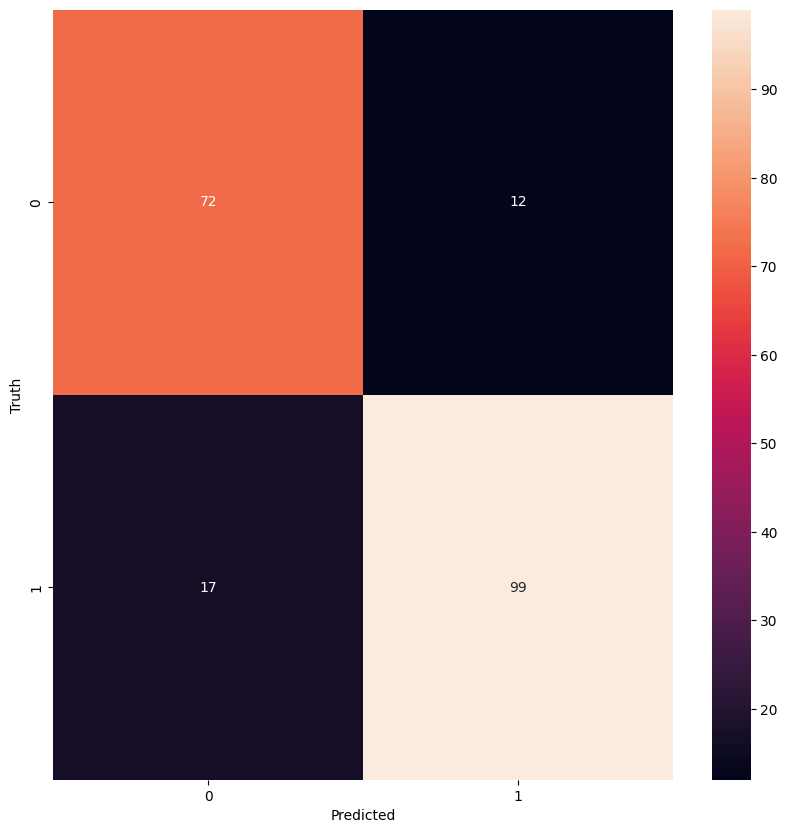

In [57]:
#Q-35>>>
#Using the above same data
from sklearn.metrics import confusion_matrix
rfc= RandomForestClassifier(n_estimators=100, random_state = 1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(cfm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [62]:
from sklearn.ensemble import StackingClassifier
#Using above same data
estimators=[
    ('dt', DecisionTreeClassifier(random_state=1)),
    ('svm', SVC(random_state=1)),
    ('lr', LogisticRegression(random_state=1))
]
stc= StackingClassifier(estimators = estimators, final_estimator = RandomForestClassifier(random_state=1))
stc.fit(X_train,y_train)
y_pred = stc.predict(X_test)
accuracy_score(y_test,y_pred)
print("Stacking Accuracy = ", accuracy_score(y_test,y_pred)*100)
#Comparing accuracy for each model
dtr = DecisionTreeClassifier(random_state=1)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print("Accuracy of Decision Tree = ", accuracy_score(y_test,y_pred)*100)

svm = SVC(random_state=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy of SVM = ", accuracy_score(y_test,y_pred)*100)

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy of Logistic Regression = ", accuracy_score(y_test,y_pred)*100)


Stacking Accuracy =  83.0
Accuracy of Decision Tree =  81.5
Accuracy of SVM =  85.5
Accuracy of Logistic Regression =  85.0


In [68]:
#Q-37>>
#using above same data
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['target'] = bc.target
X= df.drop('target', axis=1)
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
rfc = RandomForestClassifier(n_estimators = 100, random_state = 1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
important = rfc.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': important}).head(5)
feature_importance_df.sort_values('importance', ascending=False)

,feature,importance
0,mean radius,0.068120
2,mean perimeter,0.066514
3,mean area,0.045622
1,mean texture,0.018957
4,mean smoothness,0.005597


In [69]:
#Q-38>>
#using above same dataset
from sklearn.metrics import precision_score,recall_score,f1_score
bbc = BaggingClassifier(n_estimators=100,random_state =  1)
bbc.fit(X_train,y_train)
y_pred = bbc.predict(X_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Precision: 0.935064935064935
Recall: 1.0
F1 Score: 0.9664429530201343


In [71]:
#Q-39>>
#using above same dataset
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(n_estimators = 100, random_state = 1,max_depth = 5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
#With no max depth
rfc  = RandomForestClassifier(n_estimators = 100, random_state = 1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy1 = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy1)

Accuracy: 0.9649122807017544
Accuracy: 0.956140350877193


In [75]:
#Q-40>>>
#using same dataset
#Using decision tree
br = BaggingRegressor(estimator = DecisionTreeClassifier(),n_estimators = 100, random_state = 1)
br.fit(X_train,y_train)
y_pred = br.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE DTR:",mse)
#Using k-neighbour
from sklearn.neighbors import KNeighborsClassifier
br = BaggingRegressor(estimator = KNeighborsClassifier(),n_estimators = 100, random_state = 1)
br.fit(X_train,y_train)
y_pred = br.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE KNN:",mse)

MSE DTR: 0.03980701754385965
MSE KNN: 0.05609561403508772


In [76]:
#Q-41>>
#Using above dataset
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
roc = roc_auc_score(y_test, y_pred)
print("Roc_Auc:", roc)

Roc_Auc: 0.9404761904761905


In [79]:
#Q-42>>
#Using above dataset
from sklearn.model_selection import cross_val_score
bc = BaggingClassifier(estimator = DecisionTreeClassifier(),n_estimators=100, random_state=1)
score = cross_val_score(bc,X_train,y_train,cv=5)
print("Cross Validation Score:",score)
print(f"Average accuracy: {score.mean()}")

Cross Validation Score: [0.92307692 0.92307692 0.94505495 0.95604396 0.96703297]
Average accuracy: 0.9428571428571428


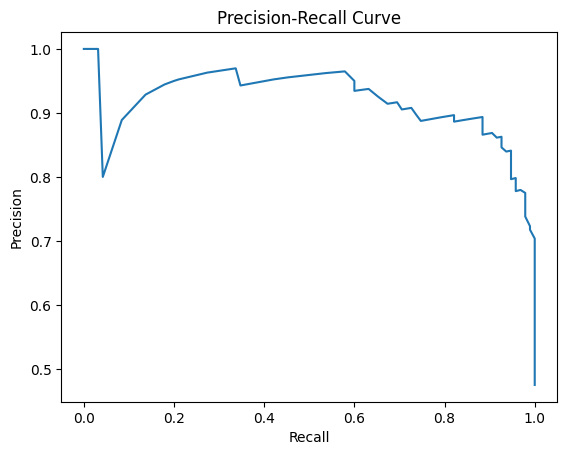

In [80]:
#Q-43>>
from sklearn.metrics import precision_recall_curve
X,y = make_classification(n_samples=1000, n_features=10, random_state=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(X_train, y_train)
y_pred_proba = rfc.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [87]:
#Q-44>>
#using above same dataset
estimators = [
    ('rf', RandomForestClassifier(random_state = 1)),
    ('lr', LogisticRegression(random_state=1))
]
stc1 = StackingClassifier(estimators = estimators ,final_estimator = RandomForestClassifier(random_state = 1),cv=5)
stc1.fit(X_train,y_train)
y_pred = stc1.predict(X_test)
accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_score(y_test,y_pred)*100)

# Train and evaluate individual models
rf_classifier = RandomForestClassifier(random_state=42)
lr_classifier = LogisticRegression(random_state=42)

rf_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
y_pred_lr = lr_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Accuracy: 83.5
Random Forest Accuracy: 0.885
Logistic Regression Accuracy: 0.875


In [90]:
#Q-45>>
#using above same dataset
bootstrap_samples = [0.5,0.7,0.9,1.0]
results = []
for i in bootstrap_samples:
  br = BaggingRegressor(estimator = DecisionTreeRegressor(),n_estimators = 100, random_state = 1,bootstrap_features = True,max_samples=i)
  br.fit(X_train,y_train)
  y_pred = br.predict(X_test)
  mse = mean_squared_error(y_test,y_pred)
  print(mse)

0.095674
0.09582399999999999
0.09326000000000001
0.092469
